In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('BR_Animal_Control_Calls.csv')
print(df.shape)
[(col, df[col].isna().sum()) for col in df.columns]

(52585, 16)


[('file_number', 0),
 ('incident_date', 0),
 ('request_type', 32850),
 ('location', 0),
 ('municipality', 0),
 ('zip_code', 28400),
 ('species', 21),
 ('breed', 815),
 ('sex', 12348),
 ('size', 1270),
 ('age', 19679),
 ('condition', 2202),
 ('temperment', 1599),
 ('disposition', 7),
 ('lat', 0),
 ('long', 0)]

In [4]:
columns = [
    "incident_date",
    "species",
    "breed",
    "sex",
    "size",
    "condition",
    "lat",
    "long"
]
df = df[columns]

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

In [6]:
df = df.replace("UNKNOWN", np.nan)
df = df.dropna()
[(col, df[col].isna().sum()) for col in ["species", "breed", "sex", "size", "condition"]]
[df[col].value_counts() for col in ["species", "breed", "sex", "size", "condition"]]
df.shape

(36600, 8)

In [8]:
!pip3 install altair

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.9/996.9 kB 5.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


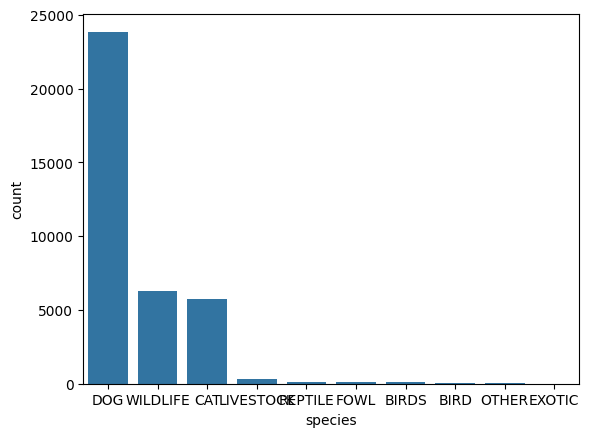

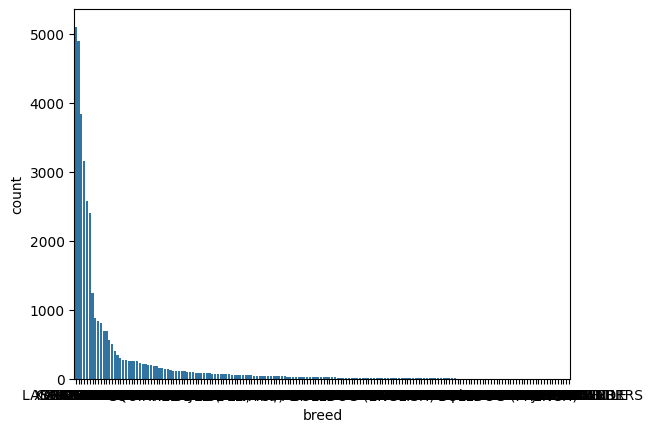

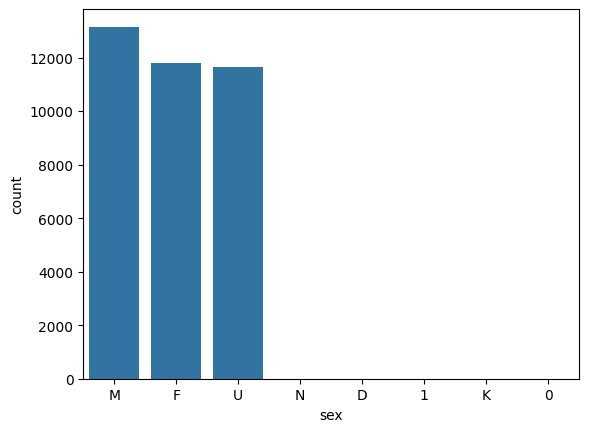

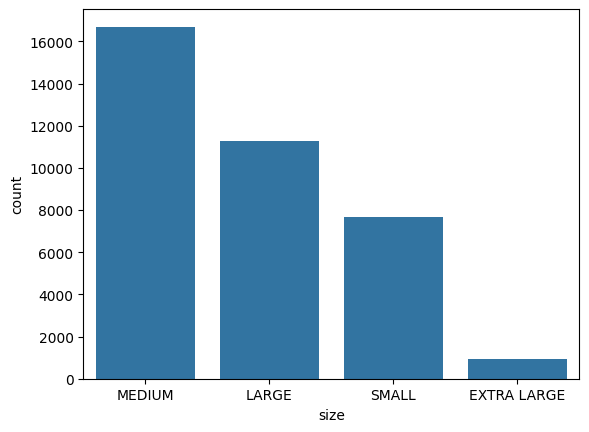

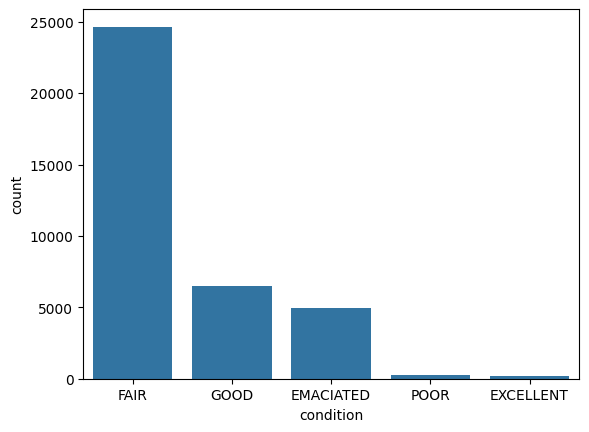

In [15]:
for i in ["species", "breed", "sex", "size", "condition"]:
    fig = plt.figure()
    ax = fig.add_subplot()
    sns.barplot(df[i].value_counts())

In [25]:
breeds = df.breed.apply(lambda x: x[1:].strip() if x[0]=="X" else x.strip()).unique()
print(len(breeds))
breeds

146


array(['PITBULL', 'POSSUM', 'GERMAN SHEPHERD', 'YORKSHIRE TERRIER',
       'DOBERMAN PINSCHER', 'DMH', 'DSH', 'OTHER', 'LABRADOR', 'PIT BULL',
       'SHIH TZU', 'RACCOON', 'TERRIER', 'SQUIRREL', 'LABRADOR RETRIEVER',
       'PIT', 'ROTTWEILLER', 'DLH', 'CHIHUAHUA', 'HAWK', 'BAT', 'HUSKY',
       'AUSTRALIAN SHEPHERD', 'HOUND', 'CATAHOULA HOUND', 'BORDER COLLIE',
       'TURTLE', 'SIAMESE', 'POINTER', 'CHOW', 'SHEPHERD', 'BEAGLE',
       'ARMADILLO', 'BEAVER', 'SNAKE DOMESTIC NON POISONOUS', 'HORSE',
       'CURR', 'BOXER', 'ROTTWEILER', 'HEALER', 'POMERANIAN', 'RABBIT',
       'DACHSHUND', 'ROOSTER', 'AMERICAN BULLDOG', 'RETRIEVER', 'COLLIE',
       'JACK RUSSEL TERRIER', 'BLUETICK HOUND', 'CATAHOULA', 'PUG',
       'MIXED', 'PEKINGESE', 'AKITA', 'ALASKAN  MALAMUTE',
       'POODLE MIN/TOY', 'BULLDOG ENGLISH', 'POODLE', 'MALTESE',
       'SCHNAUZER', 'GOAT', 'GREAT DANE', 'CHOW CHOW', 'SHEEPDOG',
       'SAINT BERNARD', 'SKUNK', 'MINIATURE PINSCHER', 'SCOTTISH TERRIER',
       'MULE',

In [26]:
df.head()

,incident_date,species,breed,sex,size,condition,lat,long
0,2016-12-27T00:00:00Z,DOG,PITBULL,F,LARGE,FAIR,30.494640,-91.156160
1,2016-12-28T00:00:00Z,WILDLIFE,POSSUM,U,LARGE,FAIR,30.431417,-91.141070
2,2016-12-28T00:00:00Z,DOG,PITBULL,M,LARGE,EMACIATED,30.648540,-91.156770
3,2016-12-28T00:00:00Z,DOG,GERMAN SHEPHERD,F,MEDIUM,EMACIATED,30.476015,-91.168460
4,2016-12-28T00:00:00Z,DOG,YORKSHIRE TERRIER,F,SMALL,EMACIATED,30.429104,-91.185036
